In [1]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime
import itertools

In [2]:
aapl = pdr.get_data_yahoo('AAPL')
msft = pdr.get_data_yahoo('MSFT')
spy = pdr.get_data_yahoo('SPY')

In [3]:
def daily_returns(series):
    dr = series[1:] / series[:-1].values - 1
    dr.loc[datetime.datetime(2009, 12, 31)] = 0
    
    return dr

In [4]:
df = pd.DataFrame(data={
    'AAPL': aapl['Close'],
    'AAPL Daily Returns': daily_returns(aapl['Close']),
    'MSFT': msft['Close'],
    'MSFT Daily Returns': daily_returns(msft['Close']),
    'SPY': spy['Close'],
    'SPY Daily Returns': daily_returns(spy['Close']),
})

df.head()

,AAPL,AAPL Daily Returns,MSFT,MSFT Daily Returns,SPY,SPY Daily Returns
Date,,,,,,
2009-12-31,30.104286,0.000000,30.480000,0.000000,111.440002,0.000000
2010-01-04,30.572857,0.015565,30.950001,0.015420,113.330002,0.016960
2010-01-05,30.625713,0.001729,30.959999,0.000323,113.629997,0.002647
2010-01-06,30.138571,-0.015906,30.770000,-0.006137,113.709999,0.000704
2010-01-07,30.082857,-0.001849,30.450001,-0.010400,114.190002,0.004221


In [5]:
def analyze(df, x, y):
    lr = LinearRegression()
    lr.fit(df['AAPL Daily Returns'].values.reshape(-1, 1), df['MSFT Daily Returns'].values)
    df.plot.scatter('AAPL Daily Returns', 'MSFT Daily Returns')
    plt.plot(np.linspace(-0.1, 0.1), lr.coef_[0] * np.linspace(-0.1, 0.1), color='r')
    plt.show()
    
    return df[[x, y]].corr()

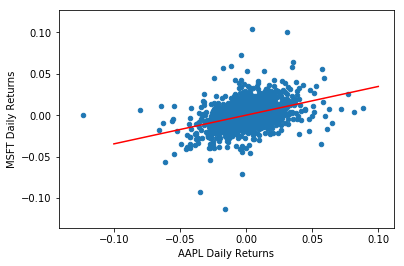

,AAPL Daily Returns,MSFT Daily Returns
AAPL Daily Returns,1.000000,0.393365
MSFT Daily Returns,0.393365,1.000000


In [6]:
analyze(df, 'AAPL Daily Returns', 'MSFT Daily Returns')

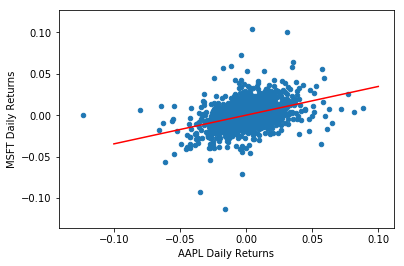

,AAPL Daily Returns,SPY Daily Returns
AAPL Daily Returns,1.000000,0.554048
SPY Daily Returns,0.554048,1.000000


In [7]:
analyze(df, 'AAPL Daily Returns', 'SPY Daily Returns')

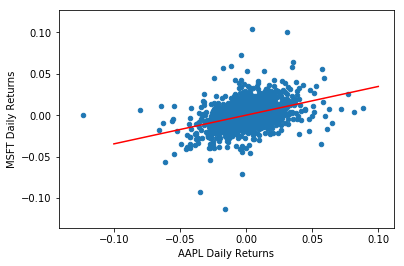

,MSFT Daily Returns,SPY Daily Returns
MSFT Daily Returns,1.000000,0.648737
SPY Daily Returns,0.648737,1.000000


In [8]:
analyze(df, 'MSFT Daily Returns', 'SPY Daily Returns')